In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import h5py
import random
import pickle
from tqdm import tqdm
from PIL import Image
import tensorflow as tf
import preproc
import warnings
warnings.filterwarnings('ignore')
import logging
tf.get_logger().setLevel(logging.ERROR)
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('mylogger')
logger.setLevel(logging.INFO)
import training
from evaluator import evaluate

/Users/wzhuo/.virtualenvs/codeproj/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/wzhuo/.virtualenvs/codeproj/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/wzhuo/.virtualenvs/codeproj/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/wzhuo/.virtualenvs/codeproj/lib/python3

In [2]:
main_path = os.path.join(os.path.dirname(os.getcwd()), 'MultiDigitRecognition')
main_path

'/Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition'

In [3]:
#### Note that the train, validation and test datasets are uploaded into LionDrive and link has been shared to TAs ####
#### The three datasets folders should be parallel with this main.ipynb (e.g. ~/train, ~/test, ~/main.ipynb) ####

# write tfrecords for all datasets, if tfrecords has already existed, then no writting process will be created
for dataset_type in ['train', 'test', 'validation']:
    dm = preproc.DataManager(main_path, dataset_type=dataset_type)
    path_to_tfrecord = os.path.join(main_path, dataset_type, dataset_type) + '.tfrecord'
    dm.write_tfrecord(path_to_tfrecord, force=False)

INFO:mylogger:--- tfrecord for train dataset already exists, no writting process will be created ---
INFO:mylogger:--- tfrecord for test dataset already exists, no writting process will be created ---
INFO:mylogger:--- tfrecord for validation dataset already exists, no writting process will be created ---


In [4]:
# create DataManager object for trainning dataset
dataset_type = 'train'
dm = preproc.DataManager(main_path, dataset_type=dataset_type)
path_to_tfrecord = os.path.join(main_path, dataset_type, dataset_type) + '.tfrecord'

In [5]:
# generate a batch of training data
image, length, digits = dm.data_generator(path_to_tfrecord, batch_size=25, is_shuffle=True)

INFO:mylogger:--- generating 25 samples from train dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


In [6]:
# get value of the batch of training data
sess = tf.InteractiveSession()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)
image_val, length_val, digits_val = sess.run([image, length, digits])
sess.close()

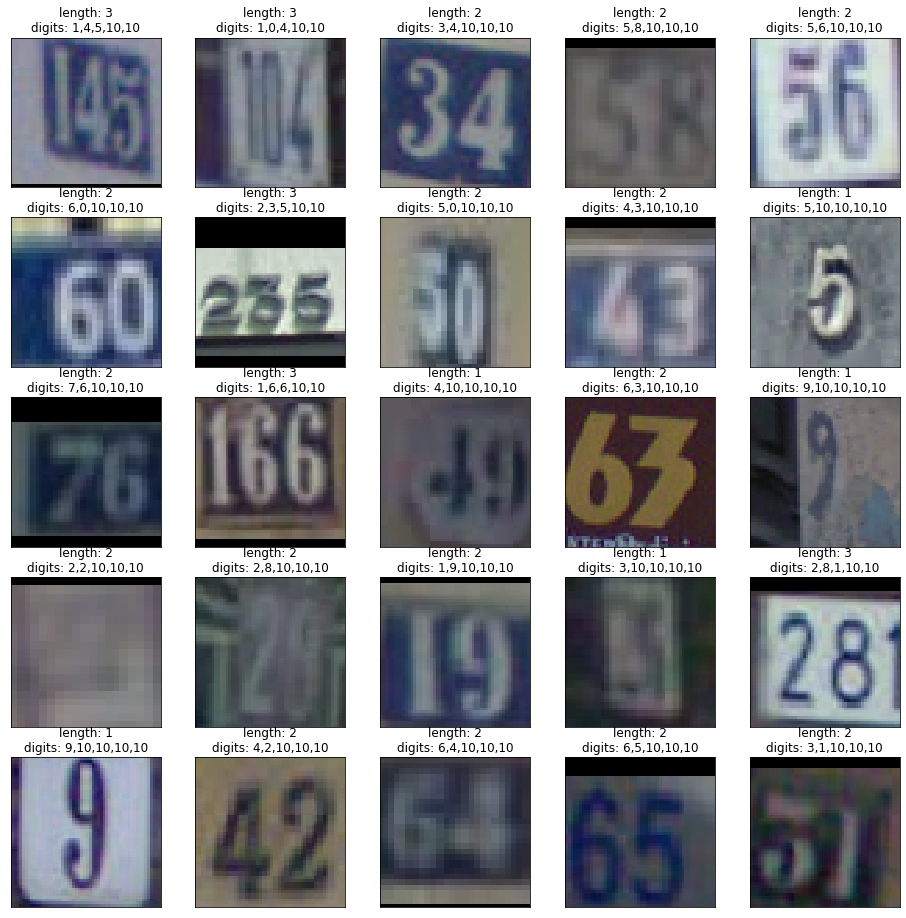

In [7]:
# print out the batch of training image
fig, axes = plt.subplots(5, 5, figsize=(16, 16))
for i, ax in enumerate(axes.flat): 
    title = 'length: {0}\ndigits: {1},{2},{3},{4},{5}'.format(length_val[i],
                                                              digits_val[i][0],
                                                              digits_val[i][1],
                                                              digits_val[i][2],
                                                              digits_val[i][3],
                                                              digits_val[i][4],)
    ax.imshow(image_val[i])
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

In [4]:
# set parameters for training
path_to_train_tfrecord = os.path.join(main_path, 'train', 'train') + '.tfrecord'
path_to_validation_tfrecord = os.path.join(main_path, 'validation', 'validation') + '.tfrecord'
path_to_trainhist = os.path.join(main_path, 'trainhist2')
training_log = os.path.join(main_path, 'logs2', 'train')
restore_checkpoint = None
training_options = {'batch_size': 32,
                    'learning_rate': 1e-2,
                    'decay_steps': 10000,
                    'decay_rate': 0.9,
                    'drop_rate':0.2,
                    'stop_criterion':20,
                    'max_step':80000}

In [5]:
# training
training._train(main_path,
                path_to_train_tfrecord,
                path_to_validation_tfrecord,
                path_to_trainhist,
                training_log,
                restore_checkpoint,
                training_options)

INFO:mylogger:--- generating 32 samples from train dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


Train the model
step 100, current val loss = 7.272809
step 200, current val loss = 7.539236
step 300, current val loss = 6.457156
step 400, current val loss = 6.657464
step 500, current val loss = 7.878707
step 600, current val loss = 6.812774
step 700, current val loss = 7.576692
step 800, current val loss = 7.079167
step 900, current val loss = 6.220068
step 1000, current val loss = 6.587005
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.014266, best accuracy 0.000000 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-1000
Current stop criterion is 20
step 1100, current val loss = 6.413782
step 1200, current val loss = 6.039510
step 1300, current val loss = 6.225478
step 1400, current val loss = 6.609987
step 1500, current val loss = 5.396182
step 1600, current val loss = 6.273416
step 1700, current val loss = 6.149617
step 1800, current val loss = 5.438119
step 1900, current val loss = 5.461647
step 2000, current val loss = 4.467349
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.144361, best accuracy 0.014266 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-2000
Current stop criterion is 20
step 2100, current val loss = 5.027526
step 2200, current val loss = 4.666091
step 2300, current val loss = 4.775370
step 2400, current val loss = 4.605815
step 2500, current val loss = 4.594179
step 2600, current val loss = 4.103576
step 2700, current val loss = 4.057907
step 2800, current val loss = 4.835353
step 2900, current val loss = 2.936047
step 3000, current val loss = 4.332732
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.356997, best accuracy 0.144361 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-3000
Current stop criterion is 20
step 3100, current val loss = 3.706950
step 3200, current val loss = 2.491543
step 3300, current val loss = 2.944384
step 3400, current val loss = 3.452408
step 3500, current val loss = 3.106613
step 3600, current val loss = 2.205461
step 3700, current val loss = 2.569444
step 3800, current val loss = 2.835086
step 3900, current val loss = 1.680857
step 4000, current val loss = 3.035299
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.552989, best accuracy 0.356997 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-4000
Current stop criterion is 20
step 4100, current val loss = 1.729034
step 4200, current val loss = 2.099655
step 4300, current val loss = 2.599067
step 4400, current val loss = 1.467294
step 4500, current val loss = 2.332555
step 4600, current val loss = 2.181898
step 4700, current val loss = 2.365833
step 4800, current val loss = 1.909056
step 4900, current val loss = 2.953134
step 5000, current val loss = 2.755855
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.648438, best accuracy 0.552989 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-5000
Current stop criterion is 20
step 5100, current val loss = 1.491065
step 5200, current val loss = 2.079849
step 5300, current val loss = 2.320420
step 5400, current val loss = 1.841413
step 5500, current val loss = 2.725735
step 5600, current val loss = 1.015240
step 5700, current val loss = 2.556139
step 5800, current val loss = 1.365742
step 5900, current val loss = 1.576391
step 6000, current val loss = 1.135105
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.730639, best accuracy 0.648438 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-6000
Current stop criterion is 20
step 6100, current val loss = 1.854400
step 6200, current val loss = 2.227464
step 6300, current val loss = 0.955332
step 6400, current val loss = 1.349277
step 6500, current val loss = 1.384358
step 6600, current val loss = 1.526868
step 6700, current val loss = 1.414271
step 6800, current val loss = 1.078337
step 6900, current val loss = 1.325201
step 7000, current val loss = 1.115697
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.771399, best accuracy 0.730639 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-7000
Current stop criterion is 20
step 7100, current val loss = 2.135781
step 7200, current val loss = 1.912161
step 7300, current val loss = 2.356365
step 7400, current val loss = 1.110095
step 7500, current val loss = 1.390913
step 7600, current val loss = 1.278730
step 7700, current val loss = 1.150266
step 7800, current val loss = 1.325104
step 7900, current val loss = 1.058644
step 8000, current val loss = 1.158779
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.756793, best accuracy 0.771399 
===> Continue training
Current stop criterion is 19
step 8100, current val loss = 1.120709
step 8200, current val loss = 0.687546
step 8300, current val loss = 1.050586
step 8400, current val loss = 1.179228
step 8500, current val loss = 0.838935
step 8600, current val loss = 1.616734
step 8700, current val loss = 1.122598
step 8800, current val loss = 1.236690
step 8900, current val loss = 0.278021
step 9000, current val loss = 1.132971
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.808764, best accuracy 0.771399 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-9000
Current stop criterion is 20
step 9100, current val loss = 0.772912
step 9200, current val loss = 0.656550
step 9300, current val loss = 0.974701
step 9400, current val loss = 1.005737
step 9500, current val loss = 1.990742
step 9600, current val loss = 0.329714
step 9700, current val loss = 1.185307
step 9800, current val loss = 0.994193
step 9900, current val loss = 0.472793
step 10000, current val loss = 0.674158
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.799253, best accuracy 0.808764 
===> Continue training
Current stop criterion is 19
step 10100, current val loss = 0.890793
step 10200, current val loss = 0.662265
step 10300, current val loss = 0.362116
step 10400, current val loss = 0.182548
step 10500, current val loss = 1.286707
step 10600, current val loss = 0.946099
step 10700, current val loss = 0.193818
step 10800, current val loss = 1.283238
step 10900, current val loss = 0.693343
step 11000, current val loss = 0.833214
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.819973, best accuracy 0.808764 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-11000
Current stop criterion is 20
step 11100, current val loss = 1.128222
step 11200, current val loss = 0.773330
step 11300, current val loss = 0.689731
step 11400, current val loss = 0.602540
step 11500, current val loss = 0.460060
step 11600, current val loss = 1.613053
step 11700, current val loss = 0.980418
step 11800, current val loss = 1.167603
step 11900, current val loss = 0.892921
step 12000, current val loss = 0.298808
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.816916, best accuracy 0.819973 
===> Continue training
Current stop criterion is 19
step 12100, current val loss = 0.247033
step 12200, current val loss = 1.538514
step 12300, current val loss = 0.765035
step 12400, current val loss = 0.717286
step 12500, current val loss = 0.645471
step 12600, current val loss = 0.521567
step 12700, current val loss = 0.608587
step 12800, current val loss = 0.948475
step 12900, current val loss = 0.505329
step 13000, current val loss = 0.211572
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.838995, best accuracy 0.819973 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-13000
Current stop criterion is 20
step 13100, current val loss = 0.997422
step 13200, current val loss = 1.040072
step 13300, current val loss = 0.819197
step 13400, current val loss = 0.695923
step 13500, current val loss = 0.898262
step 13600, current val loss = 0.743247
step 13700, current val loss = 1.136996
step 13800, current val loss = 0.806180
step 13900, current val loss = 0.090412
step 14000, current val loss = 0.845372
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.824389, best accuracy 0.838995 
===> Continue training
Current stop criterion is 19
step 14100, current val loss = 0.394264
step 14200, current val loss = 0.305628
step 14300, current val loss = 1.151647
step 14400, current val loss = 0.499874
step 14500, current val loss = 0.867550
step 14600, current val loss = 0.270841
step 14700, current val loss = 0.722157
step 14800, current val loss = 0.500913
step 14900, current val loss = 0.376334
step 15000, current val loss = 1.704458
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.820652, best accuracy 0.838995 
===> Continue training
Current stop criterion is 18
step 15100, current val loss = 0.821134
step 15200, current val loss = 0.827924
step 15300, current val loss = 0.616648
step 15400, current val loss = 0.482447
step 15500, current val loss = 0.597656
step 15600, current val loss = 0.717484
step 15700, current val loss = 0.703252
step 15800, current val loss = 0.590486
step 15900, current val loss = 0.144704
step 16000, current val loss = 0.261207
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.854280, best accuracy 0.838995 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-16000
Current stop criterion is 20
step 16100, current val loss = 0.205390
step 16200, current val loss = 0.059438
step 16300, current val loss = 0.414790
step 16400, current val loss = 0.150929
step 16500, current val loss = 0.937916
step 16600, current val loss = 0.314373
step 16700, current val loss = 0.850593
step 16800, current val loss = 0.422792
step 16900, current val loss = 1.151075
step 17000, current val loss = 0.140257
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.821671, best accuracy 0.854280 
===> Continue training
Current stop criterion is 19
step 17100, current val loss = 0.222890
step 17200, current val loss = 0.537193
step 17300, current val loss = 0.216361
step 17400, current val loss = 0.460837
step 17500, current val loss = 0.485215
step 17600, current val loss = 0.226961
step 17700, current val loss = 0.215963
step 17800, current val loss = 0.071331
step 17900, current val loss = 0.984646
step 18000, current val loss = 0.693217
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.831522, best accuracy 0.854280 
===> Continue training
Current stop criterion is 18
step 18100, current val loss = 0.873665
step 18200, current val loss = 0.657106
step 18300, current val loss = 1.312582
step 18400, current val loss = 0.493573
step 18500, current val loss = 0.314033
step 18600, current val loss = 0.161680
step 18700, current val loss = 0.699193
step 18800, current val loss = 0.257283
step 18900, current val loss = 0.271065
step 19000, current val loss = 0.208583
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.837636, best accuracy 0.854280 
===> Continue training
Current stop criterion is 17
step 19100, current val loss = 0.050055
step 19200, current val loss = 0.284003
step 19300, current val loss = 0.182126
step 19400, current val loss = 0.197432
step 19500, current val loss = 0.275598
step 19600, current val loss = 0.372444
step 19700, current val loss = 0.175998
step 19800, current val loss = 0.548209
step 19900, current val loss = 0.262174
step 20000, current val loss = 0.431729
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.839334, best accuracy 0.854280 
===> Continue training
Current stop criterion is 16
step 20100, current val loss = 0.378804
step 20200, current val loss = 0.287404
step 20300, current val loss = 0.466214
step 20400, current val loss = 0.430271
step 20500, current val loss = 0.238929
step 20600, current val loss = 0.414357
step 20700, current val loss = 0.293298
step 20800, current val loss = 0.281758
step 20900, current val loss = 0.091420
step 21000, current val loss = 0.320148
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.844769, best accuracy 0.854280 
===> Continue training
Current stop criterion is 15
step 21100, current val loss = 0.327988
step 21200, current val loss = 0.547068
step 21300, current val loss = 0.430216
step 21400, current val loss = 0.475629
step 21500, current val loss = 0.102082
step 21600, current val loss = 0.068798
step 21700, current val loss = 0.632099
step 21800, current val loss = 0.770274
step 21900, current val loss = 0.284684
step 22000, current val loss = 0.287262
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.852242, best accuracy 0.854280 
===> Continue training
Current stop criterion is 14
step 22100, current val loss = 0.260854
step 22200, current val loss = 0.079145
step 22300, current val loss = 0.146418
step 22400, current val loss = 0.289347
step 22500, current val loss = 0.048963
step 22600, current val loss = 0.251051
step 22700, current val loss = 0.089357
step 22800, current val loss = 0.089032
step 22900, current val loss = 0.097137
step 23000, current val loss = 0.714844
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.844429, best accuracy 0.854280 
===> Continue training
Current stop criterion is 13
step 23100, current val loss = 0.271702
step 23200, current val loss = 0.190333
step 23300, current val loss = 0.676023
step 23400, current val loss = 0.129751
step 23500, current val loss = 0.121729
step 23600, current val loss = 0.079537
step 23700, current val loss = 0.403213
step 23800, current val loss = 0.118249
step 23900, current val loss = 0.217322
step 24000, current val loss = 0.181321
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.855978, best accuracy 0.854280 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-24000
Current stop criterion is 20
step 24100, current val loss = 0.090181
step 24200, current val loss = 0.057904
step 24300, current val loss = 0.032672
step 24400, current val loss = 0.168628
step 24500, current val loss = 0.149779
step 24600, current val loss = 0.552812
step 24700, current val loss = 0.199460
step 24800, current val loss = 0.330973
step 24900, current val loss = 0.227647
step 25000, current val loss = 0.624714
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.843071, best accuracy 0.855978 
===> Continue training
Current stop criterion is 19
step 25100, current val loss = 0.043843
step 25200, current val loss = 0.236686
step 25300, current val loss = 0.093548
step 25400, current val loss = 0.114452
step 25500, current val loss = 0.075567
step 25600, current val loss = 0.069289
step 25700, current val loss = 0.226074
step 25800, current val loss = 0.213615
step 25900, current val loss = 0.125721
step 26000, current val loss = 0.143836
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.856658, best accuracy 0.855978 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-26000
Current stop criterion is 20
step 26100, current val loss = 0.212187
step 26200, current val loss = 0.190500
step 26300, current val loss = 0.177863
step 26400, current val loss = 0.103094
step 26500, current val loss = 0.105239
step 26600, current val loss = 0.117217
step 26700, current val loss = 0.111608
step 26800, current val loss = 0.144842
step 26900, current val loss = 0.120081
step 27000, current val loss = 0.206310
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.841033, best accuracy 0.856658 
===> Continue training
Current stop criterion is 19
step 27100, current val loss = 0.299246
step 27200, current val loss = 0.239898
step 27300, current val loss = 0.144426
step 27400, current val loss = 0.080409
step 27500, current val loss = 0.202482
step 27600, current val loss = 0.142093
step 27700, current val loss = 0.152059
step 27800, current val loss = 0.186380
step 27900, current val loss = 0.210863
step 28000, current val loss = 0.126487
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.852582, best accuracy 0.856658 
===> Continue training
Current stop criterion is 18
step 28100, current val loss = 0.101366
step 28200, current val loss = 0.115630
step 28300, current val loss = 0.052992
step 28400, current val loss = 0.214885
step 28500, current val loss = 0.280315
step 28600, current val loss = 0.338131
step 28700, current val loss = 0.067346
step 28800, current val loss = 0.267799
step 28900, current val loss = 0.371396
step 29000, current val loss = 0.027341
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.854280, best accuracy 0.856658 
===> Continue training
Current stop criterion is 17
step 29100, current val loss = 0.150028
step 29200, current val loss = 0.093295
step 29300, current val loss = 0.089845
step 29400, current val loss = 0.126641
step 29500, current val loss = 0.153344
step 29600, current val loss = 0.207273
step 29700, current val loss = 0.132432
step 29800, current val loss = 0.161957
step 29900, current val loss = 0.212263
step 30000, current val loss = 0.446298
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.857677, best accuracy 0.856658 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-30000
Current stop criterion is 20
step 30100, current val loss = 0.288513
step 30200, current val loss = 0.042418
step 30300, current val loss = 0.261106
step 30400, current val loss = 0.094338
step 30500, current val loss = 0.076999
step 30600, current val loss = 0.128817
step 30700, current val loss = 0.072569
step 30800, current val loss = 0.010470
step 30900, current val loss = 0.199036
step 31000, current val loss = 0.026939
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.851223, best accuracy 0.857677 
===> Continue training
Current stop criterion is 19
step 31100, current val loss = 0.284920
step 31200, current val loss = 0.226291
step 31300, current val loss = 0.098194
step 31400, current val loss = 0.275845
step 31500, current val loss = 0.186975
step 31600, current val loss = 0.058241
step 31700, current val loss = 0.207669
step 31800, current val loss = 0.578497
step 31900, current val loss = 0.013478
step 32000, current val loss = 0.128342
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.851562, best accuracy 0.857677 
===> Continue training
Current stop criterion is 18
step 32100, current val loss = 0.445489
step 32200, current val loss = 0.021680
step 32300, current val loss = 0.258639
step 32400, current val loss = 0.260578
step 32500, current val loss = 0.028128
step 32600, current val loss = 0.119284
step 32700, current val loss = 0.559941
step 32800, current val loss = 0.040680
step 32900, current val loss = 0.113512
step 33000, current val loss = 0.406087
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.835938, best accuracy 0.857677 
===> Continue training
Current stop criterion is 17
step 33100, current val loss = 0.369310
step 33200, current val loss = 0.184552
step 33300, current val loss = 0.014594
step 33400, current val loss = 0.205275
step 33500, current val loss = 0.150311
step 33600, current val loss = 0.047393
step 33700, current val loss = 0.011487
step 33800, current val loss = 0.227913
step 33900, current val loss = 0.151686
step 34000, current val loss = 0.146724
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.852582, best accuracy 0.857677 
===> Continue training
Current stop criterion is 16
step 34100, current val loss = 0.265046
step 34200, current val loss = 0.009352
step 34300, current val loss = 0.117920
step 34400, current val loss = 0.196245
step 34500, current val loss = 0.037113
step 34600, current val loss = 0.016962
step 34700, current val loss = 0.030737
step 34800, current val loss = 0.248702
step 34900, current val loss = 0.142237
step 35000, current val loss = 0.115448
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.852242, best accuracy 0.857677 
===> Continue training
Current stop criterion is 15
step 35100, current val loss = 0.146894
step 35200, current val loss = 0.002871
step 35300, current val loss = 0.043727
step 35400, current val loss = 0.160762
step 35500, current val loss = 0.066330
step 35600, current val loss = 0.040105
step 35700, current val loss = 0.032686
step 35800, current val loss = 0.014768
step 35900, current val loss = 0.007211
step 36000, current val loss = 0.111597
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.861413, best accuracy 0.857677 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-36000
Current stop criterion is 20
step 36100, current val loss = 0.022291
step 36200, current val loss = 0.413644
step 36300, current val loss = 0.064547
step 36400, current val loss = 0.052568
step 36500, current val loss = 0.002069
step 36600, current val loss = 0.015124
step 36700, current val loss = 0.194305
step 36800, current val loss = 0.363011
step 36900, current val loss = 0.227310
step 37000, current val loss = 0.354926
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.859035, best accuracy 0.861413 
===> Continue training
Current stop criterion is 19
step 37100, current val loss = 0.054665
step 37200, current val loss = 0.093732
step 37300, current val loss = 0.359823
step 37400, current val loss = 0.104814
step 37500, current val loss = 0.214533
step 37600, current val loss = 0.101921
step 37700, current val loss = 0.011115
step 37800, current val loss = 0.135411
step 37900, current val loss = 0.077728
step 38000, current val loss = 0.004048
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.843410, best accuracy 0.861413 
===> Continue training
Current stop criterion is 18
step 38100, current val loss = 0.203850
step 38200, current val loss = 0.045871
step 38300, current val loss = 0.160576
step 38400, current val loss = 0.056562
step 38500, current val loss = 0.046599
step 38600, current val loss = 0.001726
step 38700, current val loss = 0.072506
step 38800, current val loss = 0.025561
step 38900, current val loss = 0.081469
step 39000, current val loss = 0.290393
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.838655, best accuracy 0.861413 
===> Continue training
Current stop criterion is 17
step 39100, current val loss = 0.017807
step 39200, current val loss = 0.221908
step 39300, current val loss = 0.002299
step 39400, current val loss = 0.234279
step 39500, current val loss = 0.082749
step 39600, current val loss = 0.126702
step 39700, current val loss = 0.267630
step 39800, current val loss = 0.007941
step 39900, current val loss = 0.060126
step 40000, current val loss = 0.198790
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.844429, best accuracy 0.861413 
===> Continue training
Current stop criterion is 16
step 40100, current val loss = 0.035364
step 40200, current val loss = 0.158535
step 40300, current val loss = 0.024920
step 40400, current val loss = 0.107809
step 40500, current val loss = 0.053371
step 40600, current val loss = 0.028371
step 40700, current val loss = 0.000371
step 40800, current val loss = 0.033989
step 40900, current val loss = 0.201751
step 41000, current val loss = 0.001610
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.847147, best accuracy 0.861413 
===> Continue training
Current stop criterion is 15
step 41100, current val loss = 0.228234
step 41200, current val loss = 0.003266
step 41300, current val loss = 0.042025
step 41400, current val loss = 0.035104
step 41500, current val loss = 0.011823
step 41600, current val loss = 0.078161
step 41700, current val loss = 0.140546
step 41800, current val loss = 0.008454
step 41900, current val loss = 0.266573
step 42000, current val loss = 0.008112
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.857337, best accuracy 0.861413 
===> Continue training
Current stop criterion is 14
step 42100, current val loss = 0.056738
step 42200, current val loss = 0.035338
step 42300, current val loss = 0.028489
step 42400, current val loss = 0.085777
step 42500, current val loss = 0.049480
step 42600, current val loss = 0.026696
step 42700, current val loss = 0.077837
step 42800, current val loss = 0.010417
step 42900, current val loss = 0.127274
step 43000, current val loss = 0.035415
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.851223, best accuracy 0.861413 
===> Continue training
Current stop criterion is 13
step 43100, current val loss = 0.018433
step 43200, current val loss = 0.028118
step 43300, current val loss = 0.078728
step 43400, current val loss = 0.035575
step 43500, current val loss = 0.072977
step 43600, current val loss = 0.005928
step 43700, current val loss = 0.172501
step 43800, current val loss = 0.117552
step 43900, current val loss = 0.048852
step 44000, current val loss = 0.014917
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.844769, best accuracy 0.861413 
===> Continue training
Current stop criterion is 12
step 44100, current val loss = 0.068917
step 44200, current val loss = 0.002221
step 44300, current val loss = 0.305733
step 44400, current val loss = 0.139662
step 44500, current val loss = 0.052784
step 44600, current val loss = 0.044901
step 44700, current val loss = 0.014319
step 44800, current val loss = 0.022070
step 44900, current val loss = 0.002211
step 45000, current val loss = 0.019459
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.859035, best accuracy 0.861413 
===> Continue training
Current stop criterion is 11
step 45100, current val loss = 0.029013
step 45200, current val loss = 0.000197
step 45300, current val loss = 0.000746
step 45400, current val loss = 0.007051
step 45500, current val loss = 0.006182
step 45600, current val loss = 0.005645
step 45700, current val loss = 0.001158
step 45800, current val loss = 0.011996
step 45900, current val loss = 0.145877
step 46000, current val loss = 0.058018
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.840353, best accuracy 0.861413 
===> Continue training
Current stop criterion is 10
step 46100, current val loss = 0.230163
step 46200, current val loss = 0.013105
step 46300, current val loss = 0.063093
step 46400, current val loss = 0.030842
step 46500, current val loss = 0.013194
step 46600, current val loss = 0.328003
step 46700, current val loss = 0.006176
step 46800, current val loss = 0.009301
step 46900, current val loss = 0.107866
step 47000, current val loss = 0.124324
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.842391, best accuracy 0.861413 
===> Continue training
Current stop criterion is 9
step 47100, current val loss = 0.059289
step 47200, current val loss = 0.125033
step 47300, current val loss = 0.101274
step 47400, current val loss = 0.031665
step 47500, current val loss = 0.326047
step 47600, current val loss = 0.083609
step 47700, current val loss = 0.410192
step 47800, current val loss = 0.001181
step 47900, current val loss = 0.008293
step 48000, current val loss = 0.007134
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.861413, best accuracy 0.861413 
===> Continue training
Current stop criterion is 8
step 48100, current val loss = 0.057892
step 48200, current val loss = 0.103321
step 48300, current val loss = 0.031703
step 48400, current val loss = 0.035479
step 48500, current val loss = 0.083908
step 48600, current val loss = 0.015170
step 48700, current val loss = 0.006244
step 48800, current val loss = 0.016046
step 48900, current val loss = 0.018495
step 49000, current val loss = 0.223979
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.851223, best accuracy 0.861413 
===> Continue training
Current stop criterion is 7
step 49100, current val loss = 0.003334
step 49200, current val loss = 0.007697
step 49300, current val loss = 0.003107
step 49400, current val loss = 0.006730
step 49500, current val loss = 0.017335
step 49600, current val loss = 0.067734
step 49700, current val loss = 0.004718
step 49800, current val loss = 0.000924
step 49900, current val loss = 0.031705
step 50000, current val loss = 0.005231
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.850543, best accuracy 0.861413 
===> Continue training
Current stop criterion is 6
step 50100, current val loss = 0.012940
step 50200, current val loss = 0.000823
step 50300, current val loss = 0.041978
step 50400, current val loss = 0.004328
step 50500, current val loss = 0.004099
step 50600, current val loss = 0.009071
step 50700, current val loss = 0.049260
step 50800, current val loss = 0.081944
step 50900, current val loss = 0.130931
step 51000, current val loss = 0.000405
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.859715, best accuracy 0.861413 
===> Continue training
Current stop criterion is 5
step 51100, current val loss = 0.007229
step 51200, current val loss = 0.001197
step 51300, current val loss = 0.064929
step 51400, current val loss = 0.050828
step 51500, current val loss = 0.015189
step 51600, current val loss = 0.009541
step 51700, current val loss = 0.004992
step 51800, current val loss = 0.007247
step 51900, current val loss = 0.059964
step 52000, current val loss = 0.035550
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.868207, best accuracy 0.861413 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-52000
Current stop criterion is 20
step 52100, current val loss = 0.038841
step 52200, current val loss = 0.101814
step 52300, current val loss = 0.000687
step 52400, current val loss = 0.010101
step 52500, current val loss = 0.101279
step 52600, current val loss = 0.014549
step 52700, current val loss = 0.013348
step 52800, current val loss = 0.001028
step 52900, current val loss = 0.008861
step 53000, current val loss = 0.021249
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.864470, best accuracy 0.868207 
===> Continue training
Current stop criterion is 19
step 53100, current val loss = 0.034539
step 53200, current val loss = 0.087379
step 53300, current val loss = 0.011551
step 53400, current val loss = 0.009649
step 53500, current val loss = 0.021465
step 53600, current val loss = 0.038312
step 53700, current val loss = 0.003559
step 53800, current val loss = 0.019622
step 53900, current val loss = 0.007855
step 54000, current val loss = 0.003577
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.863111, best accuracy 0.868207 
===> Continue training
Current stop criterion is 18
step 54100, current val loss = 0.102861
step 54200, current val loss = 0.028634
step 54300, current val loss = 0.016867
step 54400, current val loss = 0.000510
step 54500, current val loss = 0.020621
step 54600, current val loss = 0.012925
step 54700, current val loss = 0.030127
step 54800, current val loss = 0.000554
step 54900, current val loss = 0.110215
step 55000, current val loss = 0.045651
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.856318, best accuracy 0.868207 
===> Continue training
Current stop criterion is 17
step 55100, current val loss = 0.065127
step 55200, current val loss = 0.001217
step 55300, current val loss = 0.135538
step 55400, current val loss = 0.036119
step 55500, current val loss = 0.008515
step 55600, current val loss = 0.020314
step 55700, current val loss = 0.022830
step 55800, current val loss = 0.100487
step 55900, current val loss = 0.044611
step 56000, current val loss = 0.002331
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.855299, best accuracy 0.868207 
===> Continue training
Current stop criterion is 16
step 56100, current val loss = 0.025091
step 56200, current val loss = 0.080669
step 56300, current val loss = 0.070893
step 56400, current val loss = 0.001197
step 56500, current val loss = 0.051115
step 56600, current val loss = 0.009357
step 56700, current val loss = 0.006052
step 56800, current val loss = 0.030001
step 56900, current val loss = 0.027655
step 57000, current val loss = 0.020212
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.865829, best accuracy 0.868207 
===> Continue training
Current stop criterion is 15
step 57100, current val loss = 0.003101
step 57200, current val loss = 0.094401
step 57300, current val loss = 0.002388
step 57400, current val loss = 0.029955
step 57500, current val loss = 0.001021
step 57600, current val loss = 0.003520
step 57700, current val loss = 0.017505
step 57800, current val loss = 0.182371
step 57900, current val loss = 0.001245
step 58000, current val loss = 0.011804
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.863451, best accuracy 0.868207 
===> Continue training
Current stop criterion is 14
step 58100, current val loss = 0.002140
step 58200, current val loss = 0.001164
step 58300, current val loss = 0.009521
step 58400, current val loss = 0.032850
step 58500, current val loss = 0.001092
step 58600, current val loss = 0.003342
step 58700, current val loss = 0.007916
step 58800, current val loss = 0.139370
step 58900, current val loss = 0.004261
step 59000, current val loss = 0.000463
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.863111, best accuracy 0.868207 
===> Continue training
Current stop criterion is 13
step 59100, current val loss = 0.002680
step 59200, current val loss = 0.001437
step 59300, current val loss = 0.068942
step 59400, current val loss = 0.016376
step 59500, current val loss = 0.011315
step 59600, current val loss = 0.006109
step 59700, current val loss = 0.010601
step 59800, current val loss = 0.003400
step 59900, current val loss = 0.000214
step 60000, current val loss = 0.005960
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.857677, best accuracy 0.868207 
===> Continue training
Current stop criterion is 12
step 60100, current val loss = 0.004677
step 60200, current val loss = 0.527147
step 60300, current val loss = 0.040339
step 60400, current val loss = 0.000179
step 60500, current val loss = 0.006079
step 60600, current val loss = 0.000566
step 60700, current val loss = 0.001816
step 60800, current val loss = 0.067799
step 60900, current val loss = 0.021641
step 61000, current val loss = 0.000402
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.861413, best accuracy 0.868207 
===> Continue training
Current stop criterion is 11
step 61100, current val loss = 0.021465
step 61200, current val loss = 0.002138
step 61300, current val loss = 0.022433
step 61400, current val loss = 0.000904
step 61500, current val loss = 0.000445
step 61600, current val loss = 0.014095
step 61700, current val loss = 0.003424
step 61800, current val loss = 0.063002
step 61900, current val loss = 0.191757
step 62000, current val loss = 0.046840
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.852921, best accuracy 0.868207 
===> Continue training
Current stop criterion is 10
step 62100, current val loss = 0.020694
step 62200, current val loss = 0.001103
step 62300, current val loss = 0.007962
step 62400, current val loss = 0.030912
step 62500, current val loss = 0.088788
step 62600, current val loss = 0.033927
step 62700, current val loss = 0.008679
step 62800, current val loss = 0.001659
step 62900, current val loss = 0.000186
step 63000, current val loss = 0.016779
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.865489, best accuracy 0.868207 
===> Continue training
Current stop criterion is 9
step 63100, current val loss = 0.002486
step 63200, current val loss = 0.210306
step 63300, current val loss = 0.001004
step 63400, current val loss = 0.003740
step 63500, current val loss = 0.013819
step 63600, current val loss = 0.000593
step 63700, current val loss = 0.029556
step 63800, current val loss = 0.639525
step 63900, current val loss = 0.039209
step 64000, current val loss = 0.000225
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.852921, best accuracy 0.868207 
===> Continue training
Current stop criterion is 8
step 64100, current val loss = 0.049439
step 64200, current val loss = 0.029565
step 64300, current val loss = 0.009477
step 64400, current val loss = 0.001495
step 64500, current val loss = 0.000230
step 64600, current val loss = 0.001733
step 64700, current val loss = 0.000960
step 64800, current val loss = 0.000533
step 64900, current val loss = 0.001709
step 65000, current val loss = 0.000197
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.872622, best accuracy 0.868207 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-65000
Current stop criterion is 20
step 65100, current val loss = 0.000688
step 65200, current val loss = 0.006724
step 65300, current val loss = 0.009562
step 65400, current val loss = 0.005561
step 65500, current val loss = 0.133268
step 65600, current val loss = 0.001289
step 65700, current val loss = 0.000799
step 65800, current val loss = 0.274721
step 65900, current val loss = 0.053917
step 66000, current val loss = 0.000739
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.856997, best accuracy 0.872622 
===> Continue training
Current stop criterion is 19
step 66100, current val loss = 0.009563
step 66200, current val loss = 0.004853
step 66300, current val loss = 0.006178
step 66400, current val loss = 0.005733
step 66500, current val loss = 0.014044
step 66600, current val loss = 0.004505
step 66700, current val loss = 0.035266
step 66800, current val loss = 0.016990
step 66900, current val loss = 0.008320
step 67000, current val loss = 0.028108
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.870245, best accuracy 0.872622 
===> Continue training
Current stop criterion is 18
step 67100, current val loss = 0.001818
step 67200, current val loss = 0.000807
step 67300, current val loss = 0.160895
step 67400, current val loss = 0.012894
step 67500, current val loss = 0.001562
step 67600, current val loss = 0.001711
step 67700, current val loss = 0.048233
step 67800, current val loss = 0.034559
step 67900, current val loss = 0.012290
step 68000, current val loss = 0.000655
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.863791, best accuracy 0.872622 
===> Continue training
Current stop criterion is 17
step 68100, current val loss = 0.017844
step 68200, current val loss = 0.000570
step 68300, current val loss = 0.001554
step 68400, current val loss = 0.009144
step 68500, current val loss = 0.101928
step 68600, current val loss = 0.032194
step 68700, current val loss = 0.014886
step 68800, current val loss = 0.007615
step 68900, current val loss = 0.001740
step 69000, current val loss = 0.003522
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.873981, best accuracy 0.872622 
===> Model saved to file: /Users/wzhuo/Documents/codeproj/github/e4040-2019Fall-finalproj-wz2466/MultiDigitRecognition/logs2/train/model.ckpt-69000
Current stop criterion is 20
step 69100, current val loss = 0.000217
step 69200, current val loss = 0.060737
step 69300, current val loss = 0.007597
step 69400, current val loss = 0.032581
step 69500, current val loss = 0.111604
step 69600, current val loss = 0.026186
step 69700, current val loss = 0.002067
step 69800, current val loss = 0.003046
step 69900, current val loss = 0.060488
step 70000, current val loss = 0.004913
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.860734, best accuracy 0.873981 
===> Continue training
Current stop criterion is 19
step 70100, current val loss = 0.004034
step 70200, current val loss = 0.015966
step 70300, current val loss = 0.003136
step 70400, current val loss = 0.000181
step 70500, current val loss = 0.001026
step 70600, current val loss = 0.010170
step 70700, current val loss = 0.014847
step 70800, current val loss = 0.000466
step 70900, current val loss = 0.001398
step 71000, current val loss = 0.002678
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.860394, best accuracy 0.873981 
===> Continue training
Current stop criterion is 18
step 71100, current val loss = 0.000105
step 71200, current val loss = 0.003141
step 71300, current val loss = 0.029106
step 71400, current val loss = 0.006326
step 71500, current val loss = 0.036156
step 71600, current val loss = 0.007613
step 71700, current val loss = 0.000049
step 71800, current val loss = 0.004605
step 71900, current val loss = 0.001333
step 72000, current val loss = 0.001660
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.867867, best accuracy 0.873981 
===> Continue training
Current stop criterion is 17
step 72100, current val loss = 0.000309
step 72200, current val loss = 0.006942
step 72300, current val loss = 0.000037
step 72400, current val loss = 0.178125
step 72500, current val loss = 0.008868
step 72600, current val loss = 0.158827
step 72700, current val loss = 0.000385
step 72800, current val loss = 0.000131
step 72900, current val loss = 0.000906
step 73000, current val loss = 0.004574
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.868207, best accuracy 0.873981 
===> Continue training
Current stop criterion is 16
step 73100, current val loss = 0.000154
step 73200, current val loss = 0.000318
step 73300, current val loss = 0.003936
step 73400, current val loss = 0.003334
step 73500, current val loss = 0.079678
step 73600, current val loss = 0.010967
step 73700, current val loss = 0.006520
step 73800, current val loss = 0.528669
step 73900, current val loss = 0.007254
step 74000, current val loss = 0.001104
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.859035, best accuracy 0.873981 
===> Continue training
Current stop criterion is 15
step 74100, current val loss = 0.008579
step 74200, current val loss = 0.000878
step 74300, current val loss = 0.016655
step 74400, current val loss = 0.000087
step 74500, current val loss = 0.003285
step 74600, current val loss = 0.006028
step 74700, current val loss = 0.012468
step 74800, current val loss = 0.000048
step 74900, current val loss = 0.001132
step 75000, current val loss = 0.001058
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.865149, best accuracy 0.873981 
===> Continue training
Current stop criterion is 14
step 75100, current val loss = 0.002045
step 75200, current val loss = 0.000263
step 75300, current val loss = 0.000259
step 75400, current val loss = 0.003916
step 75500, current val loss = 0.000436
step 75600, current val loss = 0.002559
step 75700, current val loss = 0.000079
step 75800, current val loss = 0.001968
step 75900, current val loss = 0.000043
step 76000, current val loss = 0.001183
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.868546, best accuracy 0.873981 
===> Continue training
Current stop criterion is 13
step 76100, current val loss = 0.006303
step 76200, current val loss = 0.001501
step 76300, current val loss = 0.000026
step 76400, current val loss = 0.048539
step 76500, current val loss = 0.002484
step 76600, current val loss = 0.000276
step 76700, current val loss = 0.004158
step 76800, current val loss = 0.003178
step 76900, current val loss = 0.037874
step 77000, current val loss = 0.001761
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.872962, best accuracy 0.873981 
===> Continue training
Current stop criterion is 12
step 77100, current val loss = 0.001861
step 77200, current val loss = 0.016379
step 77300, current val loss = 0.013997
step 77400, current val loss = 0.001427
step 77500, current val loss = 0.029742
step 77600, current val loss = 0.001570
step 77700, current val loss = 0.000936
step 77800, current val loss = 0.006152
step 77900, current val loss = 0.000081
step 78000, current val loss = 0.015160
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.867188, best accuracy 0.873981 
===> Continue training
Current stop criterion is 11
step 78100, current val loss = 0.005784
step 78200, current val loss = 0.074095
step 78300, current val loss = 0.020540
step 78400, current val loss = 0.013411
step 78500, current val loss = 0.001351
step 78600, current val loss = 0.000359
step 78700, current val loss = 0.000253
step 78800, current val loss = 0.001286
step 78900, current val loss = 0.001540
step 79000, current val loss = 0.000036
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.865149, best accuracy 0.873981 
===> Continue training
Current stop criterion is 10
step 79100, current val loss = 0.006523
step 79200, current val loss = 0.000246
step 79300, current val loss = 0.000329
step 79400, current val loss = 0.001372
step 79500, current val loss = 0.000299
step 79600, current val loss = 0.000804
step 79700, current val loss = 0.003570
step 79800, current val loss = 0.054399
step 79900, current val loss = 0.047809
step 80000, current val loss = 0.000207
===> Evaluating val data...


INFO:mylogger:--- generating 128 samples from validation dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


===> accuracy = 0.861753, best accuracy 0.873981 
===> Continue training
Current stop criterion is 9
Finished training


In [8]:
with open(os.path.join(main_path, 'trainhist') + '/losshist.pkl', 'rb') as f:
    loss_hist = pickle.load(f)
    f.close()
    
with open(os.path.join(main_path, 'trainhist') + '/acchist.pkl', 'rb') as f:
    acc_hist = pickle.load(f)
    f.close()

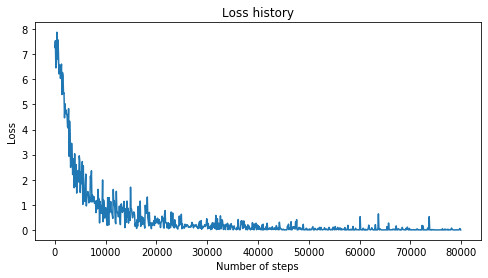

In [9]:
# plot loss history
save_dir = os.path.join(main_path, 'graphs') + '/losshist.png'
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
x = np.arange(len(loss_hist)) * 100
ax.plot(x, loss_hist)
ax.set_xlabel('Number of steps')
ax.set_ylabel('Loss')
ax.set_title('Loss history')
plt.savefig(save_dir)
plt.show()

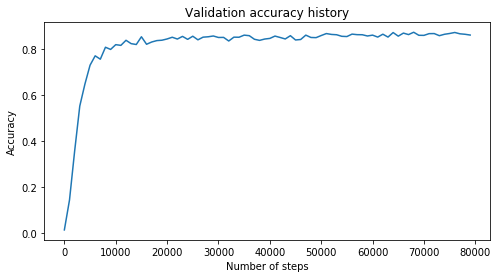

In [10]:
# plot validation accuracy history
save_dir = os.path.join(main_path, 'graphs') + '/acchist.png'
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
x = np.arange(len(acc_hist)) * 1000
ax.plot(x, acc_hist)
ax.set_xlabel('Number of steps')
ax.set_ylabel('Accuracy')
ax.set_title('Validation accuracy history')
plt.savefig(save_dir)
plt.show()

INFO:mylogger:--- generating 10000 samples from test dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---
INFO:mylogger:--- generating 10000 samples from test dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---
INFO:mylogger:--- generating 10000 samples from test dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---
INFO:mylogger:--- generating 10000 samples from test dataset ---
INFO:mylogger:--- read and decode tfrecord ---
INFO:mylogger:--- augmenting images ---


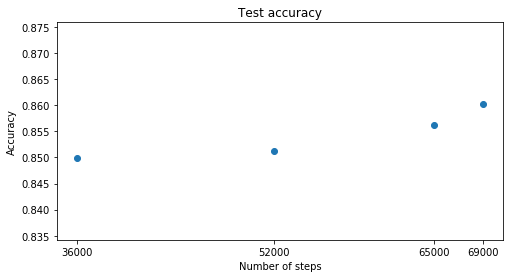

In [13]:
# compare test accuracy from different saved models, note that the model with larger index has better validation acc
dataset_type = 'test'
path_to_test_tfrecord = os.path.join(main_path, dataset_type, dataset_type) + '.tfrecord'
test_acc = []
model_index = [36000, 52000, 65000, 69000]
for index in model_index:
    path_to_model_checkpoint_file = os.path.join(main_path, 'logs', 'train') + '/model.ckpt-{}'.format(index)
    acc = evaluate(main_path,
                   path_to_model_checkpoint_file,
                   path_to_test_tfrecord,
                   dataset_type=dataset_type,
                   batch_size=10000,
                   drop_rate=0.0)
    test_acc.append(acc)

save_dir = os.path.join(main_path, 'graphs') + '/testacc.png'
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.scatter(model_index, test_acc)
ax.set_xlabel('Number of steps')
ax.set_ylabel('Accuracy')
ax.set_xticks(model_index)
ax.set_title('Test accuracy')
plt.savefig(save_dir)
plt.show()

In [14]:
# print test accuracy from our best model
print('Test accuracy from best model is {}'.format(test_acc[-1]))

Test accuracy from best model is 0.8601999878883362


<span style="color:blue">Tensorboard Graph</span> Below is a screenshot for our tensorboard graph.
![Tensorboard_2](./graphs/tensorboard_structure.png)